In [1]:
!pip install -r requirements.txt

#### import delle librerie

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#### carico i dati di training e di test dai rispettivi csv

In [3]:
input_file_train = "train.csv"
input_file_test = "test.csv"

data_train = pd.read_csv(input_file_train)
data_test = pd.read_csv(input_file_test)

#### analizzo i dati

In [4]:
data_train.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,77.67,Others,64.89,Others,Commerce,70.67,Comm&Mgmt,No,89.0,Mkt&Fin,60.39,300000.0
1,Placed,M,84.20,Central,69.40,Central,Science,65.00,Sci&Tech,Yes,80.0,Mkt&HR,52.72,255000.0
2,Not Placed,M,52.00,Others,55.00,Others,Commerce,56.30,Comm&Mgmt,No,59.0,Mkt&Fin,64.74,NaN
3,Placed,M,63.00,Central,60.00,Central,Commerce,57.00,Comm&Mgmt,Yes,78.0,Mkt&Fin,54.55,204000.0
4,Placed,F,60.23,Central,69.00,Central,Science,66.00,Comm&Mgmt,No,72.0,Mkt&Fin,59.47,230000.0


In [5]:
data_test.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Not Placed,M,52.0,Others,50.0,Others,Arts,61.0,Comm&Mgmt,No,60.0,Mkt&Fin,58.52,NaN
1,Placed,M,78.5,Central,65.5,Central,Science,67.0,Sci&Tech,Yes,95.0,Mkt&Fin,64.86,280000.0
2,Placed,M,62.0,Central,72.0,Central,Commerce,65.0,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,216000.0
3,Not Placed,M,51.0,Central,44.0,Central,Commerce,57.0,Comm&Mgmt,No,64.0,Mkt&Fin,51.45,NaN
4,Not Placed,F,55.0,Central,67.0,Central,Commerce,64.0,Comm&Mgmt,No,60.0,Mkt&Fin,67.28,NaN


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          137 non-null    object 
 1   gender          137 non-null    object 
 2   ssc_p           137 non-null    float64
 3   ssc_b           137 non-null    object 
 4   hsc_p           137 non-null    float64
 5   hsc_b           137 non-null    object 
 6   hsc_s           137 non-null    object 
 7   degree_p        137 non-null    float64
 8   degree_t        137 non-null    object 
 9   workex          137 non-null    object 
 10  etest_p         137 non-null    float64
 11  specialisation  137 non-null    object 
 12  mba_p           137 non-null    float64
 13  salary          95 non-null     float64
dtypes: float64(6), object(8)
memory usage: 15.1+ KB


#### la colonna "salary" è l'unica ad avere valori nulli

#### la colonna "salary" deve essere tolta dal training set e dal test set, poichè quando è valorizzata significa che lo studente è stato collocato (ha trovato lavoro), che è proprio quello che il nostro modello deve imparare a predire. Infatti se non la togliessi otterrei un accuracy del 100%, semplicemente per il fatto che è come se avessi addestrato il modello passandogli in input, tra le features, anche lo status (cioè la variabile target)

In [7]:
data_train = data_train.drop(columns=["salary"])
data_test = data_test.drop(columns=["salary"])

#### prendo le colonne che sono di tipo object e ne codifico i valori con label numeriche

In [8]:
encoder = LabelEncoder()

for i in data_train.columns:
    if(data_train[i].dtype == 'object'):
          data_train[i] = encoder.fit_transform(data_train[i])

for i in data_test.columns:
    if(data_test[i].dtype == 'object'):
          data_test[i] = encoder.fit_transform(data_test[i])

In [9]:
data_train.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,1,77.67,1,64.89,1,1,70.67,0,0,89.0,0,60.39
1,1,1,84.20,0,69.40,0,2,65.00,2,1,80.0,1,52.72
2,0,1,52.00,1,55.00,1,1,56.30,0,0,59.0,0,64.74
3,1,1,63.00,0,60.00,0,1,57.00,0,1,78.0,0,54.55
4,1,0,60.23,0,69.00,0,2,66.00,0,0,72.0,0,59.47


In [10]:
data_test.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,1,52.0,1,50.0,1,0,61.0,0,0,60.0,0,58.52
1,1,1,78.5,0,65.5,0,2,67.0,2,1,95.0,0,64.86
2,1,1,62.0,0,72.0,0,1,65.0,0,0,67.0,0,56.49
3,0,1,51.0,0,44.0,0,1,57.0,0,0,64.0,0,51.45
4,0,0,55.0,0,67.0,0,1,64.0,0,0,60.0,0,67.28


#### eseguo lo split dei dati

In [11]:
X_train = data_train.drop(columns=["status"])
y_train = data_train["status"]
X_test = data_test.drop(columns=["status"])
y_test = data_test["status"]

#### creo una pipeline che esegue prima una standardizzazione dei valori del training set, e poi addestra il modello tramite Logistic Regression. La standardizzazione fa in modo che ogni feature abbia media uguale a 0 e deviazione standard uguale a 1, e serve per centrare e ridimensionare le features in modo tale che possano essere comparate su uno stesso livello di importanza

In [12]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

#### verifico lo score sul training set e sul test set

train score: 0.88
test score: 0.97


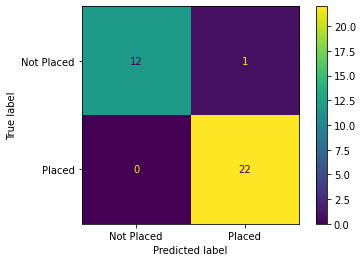

In [13]:
print("train score: %.2f" % pipe.score(X_train, y_train))
print("test score: %.2f" % pipe.score(X_test, y_test))

plot_confusion_matrix(pipe, X_test, y_test, values_format='n', display_labels=['Not Placed','Placed'])
plt.show()